In [16]:
!pip install python_louvain


In [17]:
import pandas as pd
import networkx as nx
from community import community_louvain


In [18]:
your_path = r"/diabetes.csv"
data = pd.read_csv(your_path)
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [19]:
import pandas as pd
import networkx as nx

G = nx.Graph()
for i, row in data.iterrows():
    Glucose = row['Glucose']
    BMI = row['BMI']
    Insulin = row['Insulin']

    if isinstance(Glucose, float) and pd.isna(Glucose):
        continue

    if isinstance(BMI, float) and pd.isna(BMI):
        continue

    if isinstance(Insulin, float) and pd.isna(Insulin):
        continue

    G.add_edge(Glucose, BMI, weight=Insulin)


In [20]:
partition = community_louvain.best_partition(G)


In [21]:
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)


In [22]:
import matplotlib.pyplot as plt


Community 148.0: 0
Community 85.0: 1
Community 183.0: 2
Community 89.0: 3
Community 137.0: 4
Community 116.0: 5
Community 78.0: 6
Community 115.0: 7
Community 197.0: 8
Community 125.0: 9
Community 110.0: 10
Community 168.0: 11
Community 139.0: 12
Community 189.0: 13
Community 166.0: 14
Community 100.0: 15
Community 118.0: 16
Community 107.0: 17
Community 103.0: 18
Community 126.0: 19
Community 99.0: 20
Community 196.0: 21
Community 119.0: 22
Community 143.0: 23
Community 147.0: 24
Community 97.0: 25
Community 145.0: 26
Community 117.0: 27
Community 109.0: 28
Community 158.0: 29
Community 88.0: 30
Community 92.0: 31
Community 122.0: 32
Community 138.0: 33
Community 102.0: 34
Community 90.0: 35
Community 111.0: 36
Community 180.0: 37
Community 133.0: 38
Community 106.0: 39
Community 171.0: 40
Community 159.0: 41
Community 146.0: 42
Community 71.0: 43
Community 105.0: 44
Community 101.0: 45
Community 176.0: 46
Community 150.0: 47
Community 73.0: 48
Community 187.0: 49
Community 84.0: 50
C

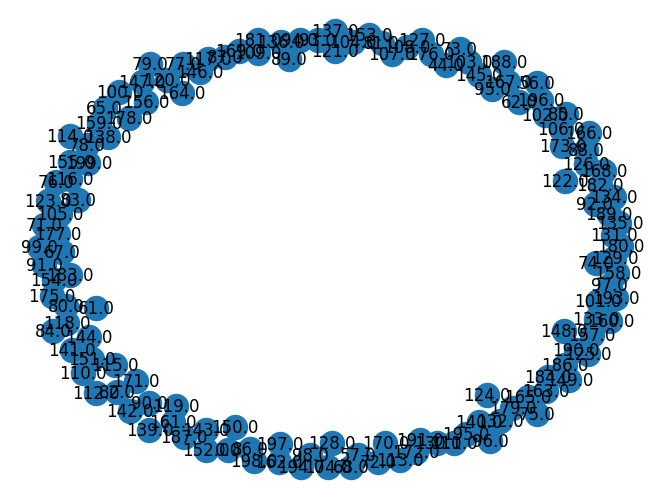

In [24]:
G = nx.Graph()


for index, row in data.iterrows():
    G.add_node(row['Glucose'], name=row['BMI'])


communities = community_louvain.best_partition(G)

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

nx.draw(G, with_labels=True)
plt.show()


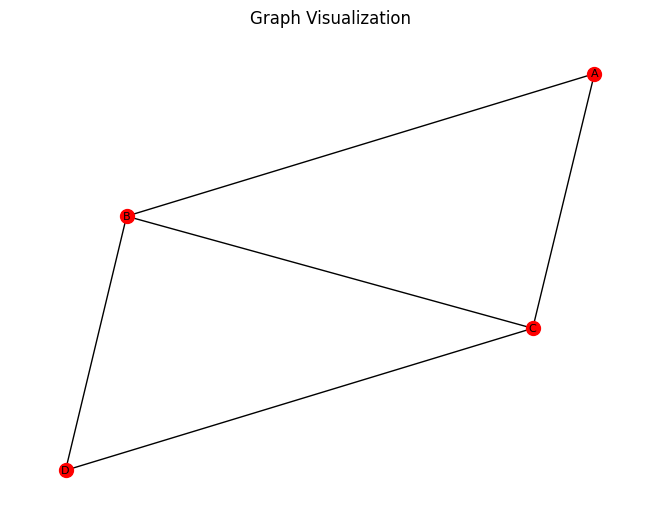

In [29]:



import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add some edges to the graph
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'D'),
])

# Find the communities in the graph
communities = nx.algorithms.community.label_propagation_communities(G)

# Define the most influential community
most_influential_community = max(communities, key=len)
most_influential_community_list = list(most_influential_community)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)

# Draw the nodes in the most influential community with a red color if it exists
if len(most_influential_community_list) > 0:
    nx.draw_networkx_nodes(G, pos, nodelist=most_influential_community_list, node_color='red', node_size=100)

plt.title('Graph Visualization')
plt.show()

